# Imports

In [33]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt, numpy as np

In [34]:
# Load the data into a pandas DataFrame for proper data wranglin'
df = pd.read_csv('marketing_campaign.csv', delimiter='\t')
print(f'There are {len(df)} rows in this dataset')
df.head()

There are 2240 rows in this dataset


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Cleaning the Data
Ok, so the data looks pretty good already - let's clean the data at the tables info

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**From the info above I can see that**:
- Columns are named differently than the data dictionary
- Columns are in a different order than the data dictionary
- Income has some null values
- Dt_Customer is not currently stored as a date type
- Some integers like can be stored as booleans like COMPLAINED, and the CAMPAIGN fields
- We should add some additional features from existing columns like Age

First, let's rename the columns to match our downstream column requirements.

In [36]:
# Define the mapping of old column names to new names
column_mapping = {
    'ID': 'ID',
    'Year_Birth': 'BIRTH_YEAR',
    'Education': 'EDUCATION',
    'Marital_Status': 'MARITAL_STATUS',
    'Income': 'INCOME',
    'Kidhome': 'CHILDREN_AT_HOME',
    'Teenhome': 'TEENS_AT_HOME',
    'Dt_Customer': 'START_DATE',
    'Recency': 'DAYS_SINCE_PURCHASE',
    'MntWines': 'WINE',
    'MntFruits': 'FRUIT',
    'MntMeatProducts': 'MEAT',
    'MntFishProducts': 'FISH',
    'MntSweetProducts': 'SWEETS',
    'MntGoldProds': 'GOLD',
    'NumDealsPurchases': 'DISCOUNTED_PURCHASES',
    'NumWebPurchases': 'WEBSITE_PURCHASES',
    'NumCatalogPurchases': 'CATALOG_PURCHASES',
    'NumStorePurchases': 'STORE_PURCHASES',
    'NumWebVisitsMonth': 'WEBSITE_VISITS',
    'AcceptedCmp1': 'CAMPAIGN_1',
    'AcceptedCmp2': 'CAMPAIGN_2',
    'AcceptedCmp3': 'CAMPAIGN_3',
    'AcceptedCmp4': 'CAMPAIGN_4',
    'AcceptedCmp5': 'CAMPAIGN_5',
    'Response': 'ACCEPTED_LAST_CAMPAIGN',
    'Complain': 'COMPLAINED'
}

# Rename the columns
df.rename(columns=column_mapping, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      2240 non-null   int64  
 1   BIRTH_YEAR              2240 non-null   int64  
 2   EDUCATION               2240 non-null   object 
 3   MARITAL_STATUS          2240 non-null   object 
 4   INCOME                  2216 non-null   float64
 5   CHILDREN_AT_HOME        2240 non-null   int64  
 6   TEENS_AT_HOME           2240 non-null   int64  
 7   START_DATE              2240 non-null   object 
 8   DAYS_SINCE_PURCHASE     2240 non-null   int64  
 9   WINE                    2240 non-null   int64  
 10  FRUIT                   2240 non-null   int64  
 11  MEAT                    2240 non-null   int64  
 12  FISH                    2240 non-null   int64  
 13  SWEETS                  2240 non-null   int64  
 14  GOLD                    2240 non-null   

Nice. Secondly, let's reorder them to match the data dictionary and drop Z_CostContact and Z_Revenue

In [37]:
# Define the order of columns as per the data dictionary
ordered_columns = [
    'ID', 'BIRTH_YEAR', 'EDUCATION', 'MARITAL_STATUS', 'INCOME',
    'CHILDREN_AT_HOME', 'TEENS_AT_HOME', 'START_DATE', 'DAYS_SINCE_PURCHASE',
    'COMPLAINED', 'WINE', 'FRUIT', 'MEAT', 'FISH', 'SWEETS','GOLD',
    'DISCOUNTED_PURCHASES', 'CAMPAIGN_1', 'CAMPAIGN_2', 'CAMPAIGN_3',
    'CAMPAIGN_4', 'CAMPAIGN_5', 'ACCEPTED_LAST_CAMPAIGN', 'WEBSITE_PURCHASES',
    'CATALOG_PURCHASES', 'STORE_PURCHASES', 'WEBSITE_VISITS'
]

# Reorder the DataFrame columns
df = df[ordered_columns]
df

,ID,BIRTH_YEAR,EDUCATION,MARITAL_STATUS,INCOME,CHILDREN_AT_HOME,TEENS_AT_HOME,START_DATE,DAYS_SINCE_PURCHASE,COMPLAINED,...,CAMPAIGN_1,CAMPAIGN_2,CAMPAIGN_3,CAMPAIGN_4,CAMPAIGN_5,ACCEPTED_LAST_CAMPAIGN,WEBSITE_PURCHASES,CATALOG_PURCHASES,STORE_PURCHASES,WEBSITE_VISITS
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,0,...,0,0,0,0,0,1,8,10,4,7
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,0,...,0,0,0,0,0,0,1,1,2,5
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,0,...,0,0,0,0,0,0,8,2,10,4
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,0,...,0,0,0,0,0,0,2,0,4,6
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,0,...,0,0,0,0,0,0,5,3,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,0,...,0,0,0,0,0,0,9,3,4,5
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,0,...,1,0,0,0,0,0,8,2,5,7
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,0,...,0,0,0,1,0,0,2,3,13,6
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,0,...,0,0,0,0,0,0,6,5,10,3


It's coming along. Let's address the row count issue by dropping rows that contain nulls.

In [38]:
original_row_count = len(df)
df = df.dropna()
print(f'{original_row_count-len(df)} rows have been dropped. The row count was {original_row_count} now is {len(df)}')
df.info()

24 rows have been dropped. The row count was 2240 now is 2216
<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      2216 non-null   int64  
 1   BIRTH_YEAR              2216 non-null   int64  
 2   EDUCATION               2216 non-null   object 
 3   MARITAL_STATUS          2216 non-null   object 
 4   INCOME                  2216 non-null   float64
 5   CHILDREN_AT_HOME        2216 non-null   int64  
 6   TEENS_AT_HOME           2216 non-null   int64  
 7   START_DATE              2216 non-null   object 
 8   DAYS_SINCE_PURCHASE     2216 non-null   int64  
 9   COMPLAINED              2216 non-null   int64  
 10  WINE                    2216 non-null   int64  
 11  FRUIT                   2216 non-null   int64  
 12  MEAT                    2216 non-null   int64  
 13  FISH                    2216 non-nul

Great! Looks like the counts all align now. If we look at the Dtype column we can see that START_DATE is an object (string in this case) and should be a date type. Let's fix that. First we need to figure out what format it is in.

In [39]:
df['START_DATE']

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: START_DATE, Length: 2216, dtype: object

Looks like it's probably going to be dd-mm-YYYY. Let's make sure that all the values match two digits, a dash, two digits, a dash, four digits (XX-XX-XXXX).

In [40]:
# Regular expression pattern
pattern = r'^\d{2}-\d{2}-\d{4}$'

# Check the format of all values in the column
all_match_format = df['START_DATE'].str.match(pattern).all()

if all_match_format:
    print("All values are in format XX-XX-XXXX.")
else:
    print("Not all values are in format XX-XX-XXXX.")

All values are in format XX-XX-XXXX.


Great, now let's figure out if the first set of digits is the day digits and the second set is the month digits.

In [41]:
# Split the DataFrame
split_df = df['START_DATE'].str.split('-', expand=True)

# Analyze the range of values
first_component = split_df[0].astype(int)
second_component = split_df[1].astype(int)

print(f'First component max is: {first_component.max()}')
print(f'Second component max is: {second_component.max()}')

First component max is: 31
Second component max is: 12


Yeah, looks like the first component is the day and the second is the month. Let's change the column to a date type from format '%d-%m-%Y'

In [42]:
# Update the start date column from a string object to a date type
df.loc[:, 'START_DATE'] = pd.to_datetime(df['START_DATE'], format='%d-%m-%Y')
df['START_DATE']

0       2012-09-04 00:00:00
1       2014-03-08 00:00:00
2       2013-08-21 00:00:00
3       2014-02-10 00:00:00
4       2014-01-19 00:00:00
               ...         
2235    2013-06-13 00:00:00
2236    2014-06-10 00:00:00
2237    2014-01-25 00:00:00
2238    2014-01-24 00:00:00
2239    2012-10-15 00:00:00
Name: START_DATE, Length: 2216, dtype: object

Success! Looks like some fields are 1 if they complained and 0 if not, but they are currently stored as an int and can be stored as a bool. Let's create a pragmatic function to update them instead of eyeballing it.

In [43]:
def convert_int_to_bool(df):
    for col in df.columns:
        unique_values = df[col].unique()
        if set(unique_values) == {0, 1}:
            df.loc[:, col] = df[col].astype(bool)
    return df

df = convert_int_to_bool(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      2216 non-null   int64  
 1   BIRTH_YEAR              2216 non-null   int64  
 2   EDUCATION               2216 non-null   object 
 3   MARITAL_STATUS          2216 non-null   object 
 4   INCOME                  2216 non-null   float64
 5   CHILDREN_AT_HOME        2216 non-null   int64  
 6   TEENS_AT_HOME           2216 non-null   int64  
 7   START_DATE              2216 non-null   object 
 8   DAYS_SINCE_PURCHASE     2216 non-null   int64  
 9   COMPLAINED              2216 non-null   bool   
 10  WINE                    2216 non-null   int64  
 11  FRUIT                   2216 non-null   int64  
 12  MEAT                    2216 non-null   int64  
 13  FISH                    2216 non-null   int64  
 14  SWEETS                  2216 non-null   int64

Sweet! Looks like the COMPLAINED field and all the CAMPAIGN fields were updated. Now let's look at the unique values for all the column to see if there are any garbage entries

In [44]:
for col in df.columns:
    print(df[col].value_counts())

ID
5524    1
6885    1
3478    1
7494    1
1763    1
       ..
7235    1
3560    1
5278    1
7761    1
9405    1
Name: count, Length: 2216, dtype: int64
BIRTH_YEAR
1976    89
1971    86
1975    83
1972    78
1978    76
1970    75
1965    74
1973    72
1969    70
1974    69
1956    55
1979    53
1958    52
1977    52
1952    52
1968    51
1966    50
1959    50
1954    49
1960    49
1955    48
1982    44
1963    44
1962    44
1967    44
1951    42
1983    41
1986    41
1957    41
1964    41
1980    39
1981    38
1984    38
1961    35
1953    35
1985    32
1949    30
1989    29
1988    29
1950    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1944     7
1943     6
1995     5
1993     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: count, dtype: int64
EDUCATION
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64
MARITAL_STATUS
Married     857

Columns MARITAL_STATUS and EDUCATION have some funky entries. Now let's replace them with valid labels as we create new features.

In [45]:
# If df is a slice from another DataFrame, create an explicit copy:
df = df.copy()

# Age of customer today
df["AGE"] = datetime.datetime.now().year - df["BIRTH_YEAR"]


# Total spending on various items
df["SPENT"] = df["WINE"] + df["FRUIT"] + df["MEAT"] + df["FISH"] + df["SWEETS"] + df["GOLD"]

# Feature indicating total children living in the household
df["CHILDREN"] = df["CHILDREN_AT_HOME"] + df["TEENS_AT_HOME"]

# Feature pertaining to parenthood
df.loc[:, "IS_PARENT"] = np.where(df["CHILDREN"] > 0, 1, 0)

# Calculate the difference in days between each date and the most recent date
df["CUSTOMER_TENURE"] = (pd.to_datetime(df["START_DATE"]).max() - pd.to_datetime(df["START_DATE"])).dt.days

# Segmenting education levels into three groups
df["EDUCATION"] = df["EDUCATION"].replace({
    "Basic": "Undergraduate", "2n Cycle": "Undergraduate",
    "Graduation": "Graduate", "Master": "Postgraduate",
    "PhD": "Postgraduate"
})

# Deriving living situation by marital status "Alone"
df["LIVING_WITH"] = df["MARITAL_STATUS"].replace({
    "Married": "Partner", "Together": "Partner",
    "Absurd": "Alone", "Widow": "Alone",
    "YOLO": "Alone", "Divorced": "Alone",
    "Single": "Alone"
})

# Feature for total members in the household
df.loc[:, "FAMILY_SIZE"] = df["LIVING_WITH"].replace({"Alone": 1, "Partner": 2}) + df["CHILDREN"]

# Drop what we don't need
col_to_drop = ["ID", "BIRTH_YEAR", "MARITAL_STATUS", "START_DATE"]
df = df.drop(col_to_drop, axis=1)

df.describe()

,INCOME,CHILDREN_AT_HOME,TEENS_AT_HOME,DAYS_SINCE_PURCHASE,WINE,FRUIT,MEAT,FISH,SWEETS,GOLD,...,WEBSITE_PURCHASES,CATALOG_PURCHASES,STORE_PURCHASES,WEBSITE_VISITS,AGE,SPENT,CHILDREN,IS_PARENT,CUSTOMER_TENURE,FAMILY_SIZE
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,4.085289,2.671029,5.800993,5.319043,55.179603,607.075361,0.947202,0.714350,353.521209,2.592509
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,2.740951,2.926734,3.250785,2.425359,11.985554,602.900476,0.749062,0.451825,202.434667,0.905722
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,28.000000,5.000000,0.000000,0.000000,0.000000,1.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,2.000000,0.000000,3.000000,3.000000,47.000000,69.000000,0.000000,0.000000,180.000000,2.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,4.000000,2.000000,5.000000,6.000000,54.000000,396.500000,1.000000,1.000000,355.500000,3.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,6.000000,4.000000,8.000000,7.000000,65.000000,1048.000000,1.000000,1.000000,529.000000,3.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,27.000000,28.000000,13.000000,20.000000,131.000000,2525.000000,3.000000,1.000000,699.000000,5.000000


Great! Let's look for outliers now. Looks like there may be outliners. The 75% income is around 68k and the max is 666k. We should plot the outliers.

Relative Plot of Selected Features: Data Subset Analysis


C:\Users\A2667879\git\virtual_enviornments\demographic_segmentation\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
C:\Users\A2667879\git\virtual_enviornments\demographic_segmentation\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
C:\Users\A2667879\git\virtual_enviornments\demographic_segmentation\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
C:\Users\A2667879\git\virtual_enviornments\demographic_segmentation\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)


<Figure size 800x550 with 0 Axes>

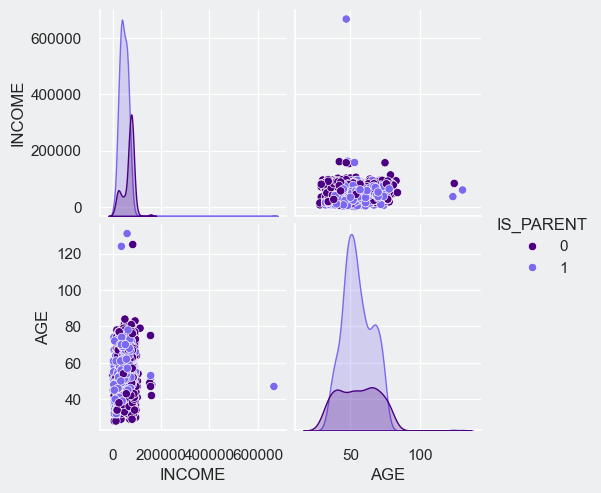

In [46]:
import matplotlib.colors as mcolors

# Setting up color preferences for the plot
sns.set(rc={'axes.facecolor': '#EDEFF0', 'figure.facecolor': '#EDEFF0'})

# Defining a color palette with a list of hex color codes
color_palette_heatmap = ['#4B0082', '#7B68EE', '#ADD8E6', '#90EE90', '#FFFFE0', '#FFA07A', '#FF4500']

# Creating a color map from the modern color palette
color_map = mcolors.LinearSegmentedColormap.from_list("color_palette_heatmap", color_palette_heatmap)

# Defining the list of features to be plotted
features_to_plot = ['INCOME', 'AGE', 'IS_PARENT']
print("Relative Plot of Selected Features: Data Subset Analysis")

# Creating the pairplot with the selected features
plt.figure()
sns.pairplot(df[features_to_plot], hue='IS_PARENT', palette=color_palette_heatmap)

# Displaying the plot
plt.show()


As you can see, there are some outliers stranded way out there for INCOME and AGE. I'll remove those.

In [47]:
df[df['AGE']>100]

,EDUCATION,INCOME,CHILDREN_AT_HOME,TEENS_AT_HOME,DAYS_SINCE_PURCHASE,COMPLAINED,WINE,FRUIT,MEAT,FISH,...,CATALOG_PURCHASES,STORE_PURCHASES,WEBSITE_VISITS,AGE,SPENT,CHILDREN,IS_PARENT,CUSTOMER_TENURE,LIVING_WITH,FAMILY_SIZE
192,Undergraduate,36640.0,1,0,99,True,15,6,8,7,...,1,2,5,124,65,1,1,276,Alone,2
239,Undergraduate,60182.0,0,1,23,False,8,0,5,7,...,0,2,4,131,22,1,1,43,Alone,2
339,Postgraduate,83532.0,0,0,36,False,755,144,562,104,...,6,4,1,125,1853,0,0,276,Partner,2


Looks like people with an age over 100 have outlived the longest lived human in history - must be old data.

In [48]:
df[df['INCOME']>160000]

,EDUCATION,INCOME,CHILDREN_AT_HOME,TEENS_AT_HOME,DAYS_SINCE_PURCHASE,COMPLAINED,WINE,FRUIT,MEAT,FISH,...,CATALOG_PURCHASES,STORE_PURCHASES,WEBSITE_VISITS,AGE,SPENT,CHILDREN,IS_PARENT,CUSTOMER_TENURE,LIVING_WITH,FAMILY_SIZE
617,Postgraduate,162397.0,1,1,31,False,85,1,16,2,...,0,1,1,48,107,2,1,391,Partner,4
687,Postgraduate,160803.0,0,0,21,False,55,16,1622,17,...,28,1,0,42,1717,0,0,694,Partner,2
2233,Graduate,666666.0,1,0,23,False,9,14,18,8,...,1,3,6,47,62,1,1,392,Partner,3


Same for income, there's a single outlier that skews the mean. I'll cap the income at 163k, just above the second-highest income.

In [49]:
# Set maxim
df = df[(df["AGE"]<=100)] # Max age set to 100
df = df[(df["INCOME"]<163000)] # Max income set to 175
df.describe()

,INCOME,CHILDREN_AT_HOME,TEENS_AT_HOME,DAYS_SINCE_PURCHASE,WINE,FRUIT,MEAT,FISH,SWEETS,GOLD,...,WEBSITE_PURCHASES,CATALOG_PURCHASES,STORE_PURCHASES,WEBSITE_VISITS,AGE,SPENT,CHILDREN,IS_PARENT,CUSTOMER_TENURE,FAMILY_SIZE
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,51958.810579,0.441682,0.505877,49.019439,305.287523,26.329566,167.029837,37.648734,27.046564,43.925859,...,4.088156,2.672242,5.806510,5.321429,55.086347,607.268083,0.947559,0.714286,353.714286,2.593128
std,21527.278844,0.536955,0.544253,28.943121,337.322940,39.744052,224.254493,54.772033,41.090991,51.706981,...,2.742187,2.927542,3.250939,2.425597,11.701599,602.513364,0.749466,0.451856,202.494886,0.906236
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,28.000000,5.000000,0.000000,0.000000,0.000000,1.000000
25%,35233.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,2.000000,0.000000,3.000000,3.000000,47.000000,69.000000,0.000000,0.000000,180.000000,2.000000
50%,51371.000000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,4.000000,2.000000,5.000000,6.000000,54.000000,397.000000,1.000000,1.000000,356.000000,3.000000
75%,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,6.000000,4.000000,8.000000,7.000000,65.000000,1048.000000,1.000000,1.000000,529.000000,3.000000
max,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,27.000000,28.000000,13.000000,20.000000,84.000000,2525.000000,3.000000,1.000000,699.000000,5.000000


Ah, much better. Time to plot correlation.

<Axes: >

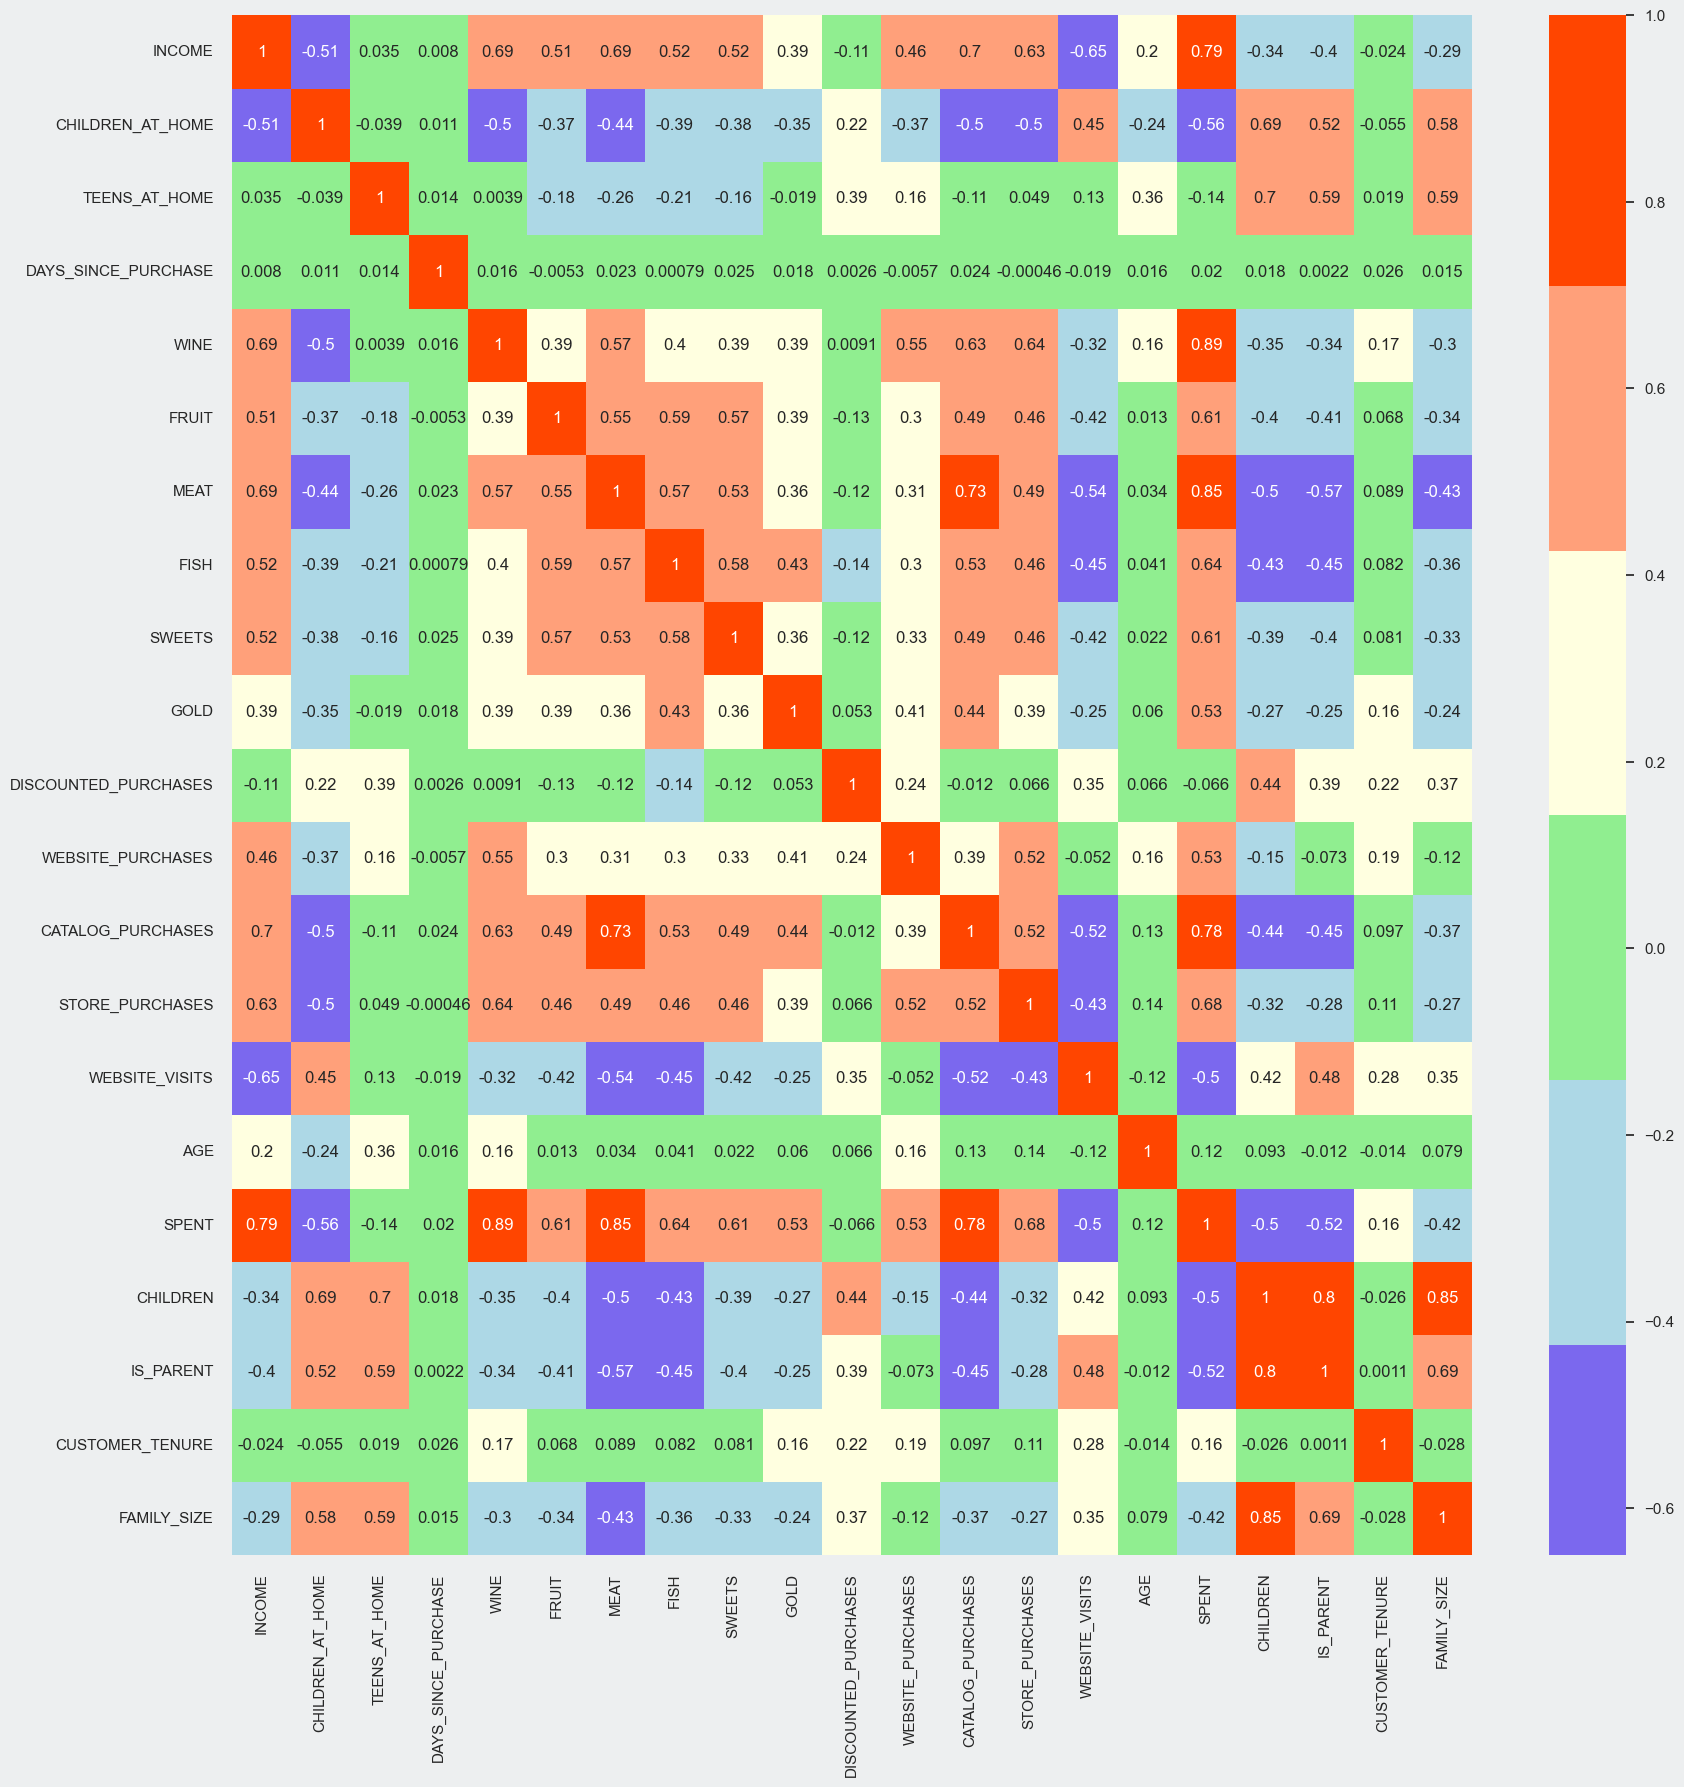

In [50]:
numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation,annot=True, cmap=color_palette_heatmap, center=0)

## Data Preprocessing

In this segment, my focus will be on preparing the data for clustering tasks.

The data preprocessing involves several key steps:

- Applying label encoding to the categorical features.
- Utilizing the standard scaler for feature scaling.
- Generating a subset dataframe for reducing dimensionality.

**Label Encoding Categorical Features**
Label encoding transforms categorical data into numbers, making it compatible with algorithms that require numerical input.


In [51]:
# Identify columns with categorical data
categorical_columns = [column for column in df.columns if df[column].dtype == 'object']
print("List of categorical variables:", categorical_columns)

# Apply label encoding to categorical columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

print("All features have been converted to numerical format")

List of categorical variables: ['EDUCATION', 'LIVING_WITH']
All features have been converted to numerical format


**Note:** Refactored markdown cell.

**Feature Scaling**
- Feature scaling adjusts all data features to a similar scale, so that no single feature dominates just because it has larger values.

In [52]:
# Duplicate the original dataframe for modifications
dataset_copy = df.copy()

# Remove specific columns that are not needed
columns_to_remove = ['CAMPAIGN_1', 'CAMPAIGN_2', 'CAMPAIGN_3', 'CAMPAIGN_4', 'CAMPAIGN_5', 'COMPLAINED', 'ACCEPTED_LAST_CAMPAIGN']
dataset_copy.drop(columns=columns_to_remove, inplace=True)

# Apply standard scaling to the dataset
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
scaled_dataset = pd.DataFrame(standard_scaler.fit_transform(dataset_copy), columns=dataset_copy.columns)
print("Features have been successfully scaled")



Features have been successfully scaled


## PCA Dimensionality Reduction
Dimensionality Reduction simplifies the data by merging multiple features into a smaller number of important ones, making it easier to analyze.

I'll simplify the data by using a technique called PCA to reduce the number of features, focusing on the most important ones, and then plot the streamlined data, aiming for a 3D representation.

              count          mean       std       min       25%       50%  \
DIMENSION_1  2212.0 -4.497106e-17  2.878602 -5.978131 -2.539467 -0.781593   
DIMENSION_2  2212.0 -1.284887e-17  1.709469 -4.194670 -1.323649 -0.173515   
DIMENSION_3  2212.0 -3.172066e-17  1.231684 -3.624875 -0.853202 -0.050795   

                  75%       max  
DIMENSION_1  2.386387  7.452926  
DIMENSION_2  1.234929  6.167982  
DIMENSION_3  0.862132  6.743349  


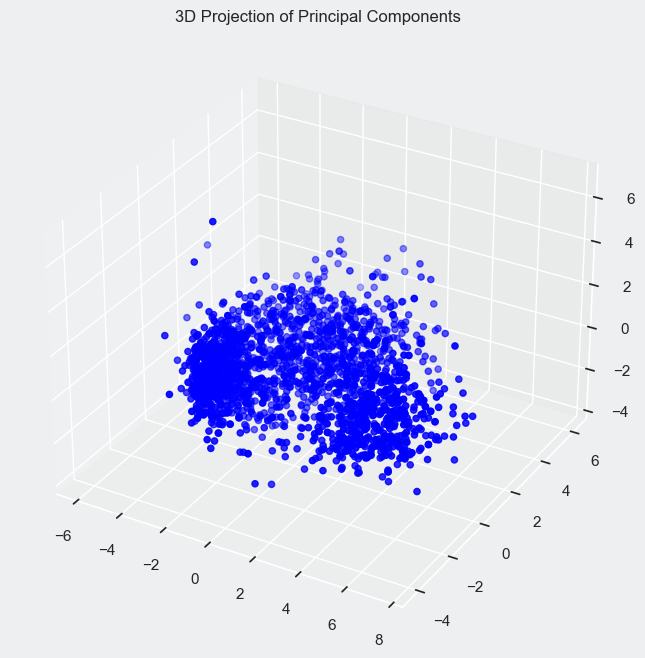

In [53]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Applying PCA to reduce dimensions to 3
principal_component_analyzer = PCA(n_components=3)
reduced_data = pd.DataFrame(principal_component_analyzer.fit_transform(scaled_dataset), columns=["DIMENSION_1", "DIMENSION_2", "DIMENSION_3"])
print(reduced_data.describe().transpose())

# Visualizing the reduced dimensions in 3D
figure = plt.figure(figsize=(10, 8))
axis = figure.add_subplot(111, projection='3d')
axis.scatter(reduced_data['DIMENSION_1'], reduced_data['DIMENSION_2'], reduced_data['DIMENSION_3'], color='blue')
axis.set_title("3D Projection of Principal Components")
plt.show()


## Clustering

Now that we've simplified our data to three dimensions aspects, we need to group similar data points together. We use a technique called "Agglomerative clustering," where we start by considering each data point as its own group and gradually combine the closest groups until we have the desired number of clusters.

- Find Optimal Cluster Count: We figure out how many groups we should have using the Elbow Method, which helps us decide on the ideal number of clusters.

- Agglomerative Clustering: With Agglomerative clustering, we put similar data points into the same groups based on their similarities.

- Visualizing Clustered Data: To understand the results, we create a scatter plot that shows the groups, making it easier to see patterns and relationships in the data.

**Find Optimal Cluster Count**

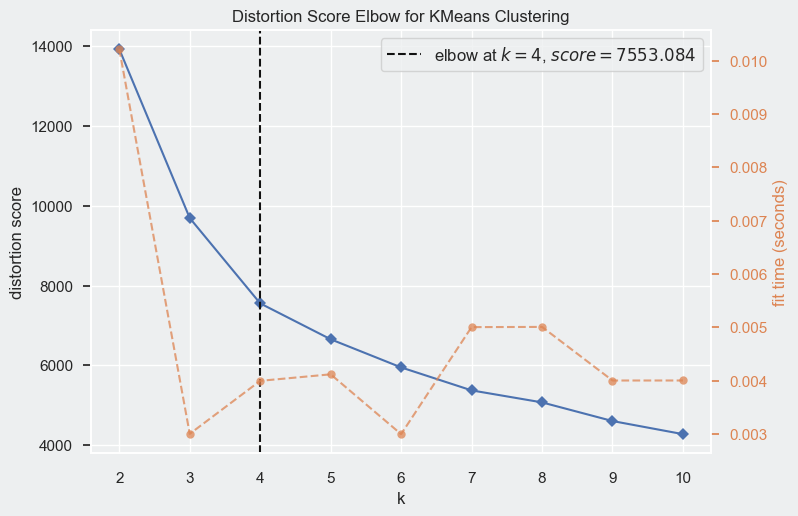

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [54]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow Method
kmeans_estimator = KMeans()
elbow_visualizer = KElbowVisualizer(kmeans_estimator, k=10)

# Fit the visualizer to the reduced data and display the plot
elbow_visualizer.fit(reduced_data)
elbow_visualizer.show()

The optimal number of clusters is 4. We will plug that into our AgglomerativeClustering Model

**Agglomerative Clustering**

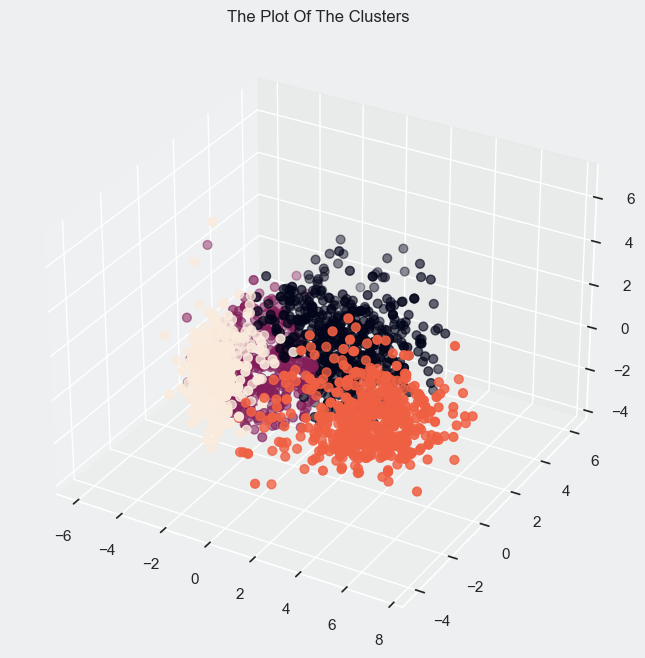

In [55]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
agglomerative_clustering = AgglomerativeClustering(n_clusters=4)
clusters = agglomerative_clustering.fit_predict(reduced_data)
reduced_data['CLUSTERS'] = clusters
df['CLUSTERS'] = clusters

# Create a 3D scatter plot to visualize clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(reduced_data['DIMENSION_1'], reduced_data['DIMENSION_2'], reduced_data['DIMENSION_3'], s=40, c=reduced_data["CLUSTERS"], marker='o')
ax.set_title("The Plot Of The Clusters")
plt.show()


## Evaluation Models
**Exploratory Data Analysis of Clusters**

In this analysis, we're sorting data into groups based on similarities, but we don't have a clear way to check if our sorting is perfect. So, we'll look closely at these groups, explore the data inside them, and try to understand what makes each group unique. This helps us find interesting patterns and insights in the data.

**Distribution of Clusters**

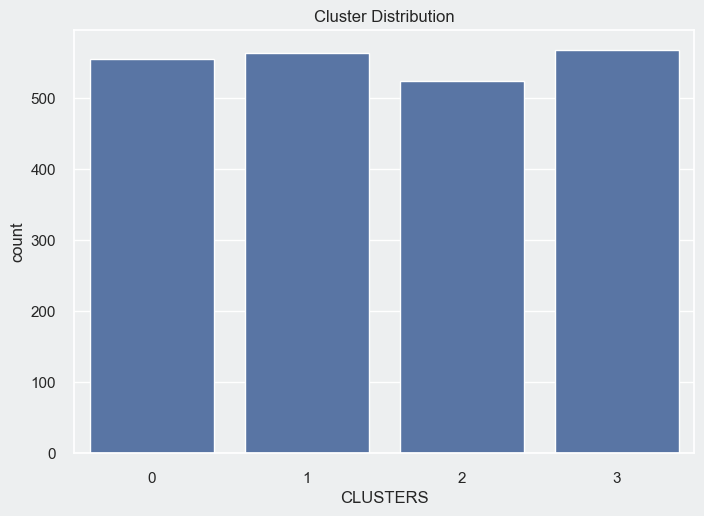

In [56]:
import seaborn as sns

# Visualize the distribution of clusters
sns.countplot(data=df, x='CLUSTERS')
plt.title("Cluster Distribution")
plt.show()


The distribution plot shows that the clusters appear to have a relatively balanced.

**Cluster Patterning**

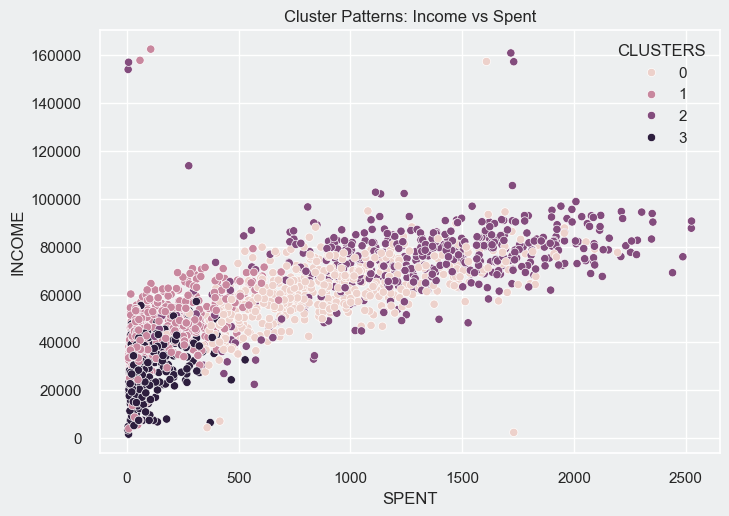

In [57]:
# Create a scatter plot to show cluster patterns based on income and spending
sns.scatterplot(data=df, x='SPENT', y='INCOME', hue='CLUSTERS')
plt.title("Cluster Patterns: Income vs Spent")
plt.show()

The pattern plot that shows there are four types of spending/income groups:
- Budget: low income & low spending
- Impulse: low income & high spending
- Average: average income & average spending
- Wealthy: high income & high spending


To get all clusters properly labeled, let's use quantiles to define cutoffs for income and spending.
We will use 50th percentile (median) for the cutoff between 'Budget' and 'Impulse'/'Average' and the same for 'Wealthy'. Additionally, we will introduce a new cutoff at 75th percentile for income and 25th percentile for spending to differentiate between 'Impulse' and 'Average'.

In [58]:
# Calculate the 50th and 75th percentiles for income and the 25th percentile for spending
income_50th_percentile = df['INCOME'].quantile(0.5)
income_75th_percentile = df['INCOME'].quantile(0.75)
spent_25th_percentile = df['SPENT'].quantile(0.25)

# Redefine the labeling conditions using these new percentiles
def label_cluster_quantiles(row):
    if row['INCOME'] <= income_50th_percentile and row['SPENT'] <= spent_25th_percentile:
        return "Budget"
    elif row['INCOME'] > income_75th_percentile and row['SPENT'] > spent_25th_percentile:
        return "Wealthy"
    elif row['INCOME'] <= income_50th_percentile and row['SPENT'] > spent_25th_percentile:
        return "Impulse"
    else:  # This covers cases where income is between the 50th and 75th percentile or spending is at or below the 25th percentile
        return "Average"

# Apply the new labeling conditions to the test DataFrame
df['CLUSTERS'] = df.apply(label_cluster_quantiles, axis=1)

**Product Spending Distribution**
Next, let's examine how the different grocery products are distributed within each cluster.

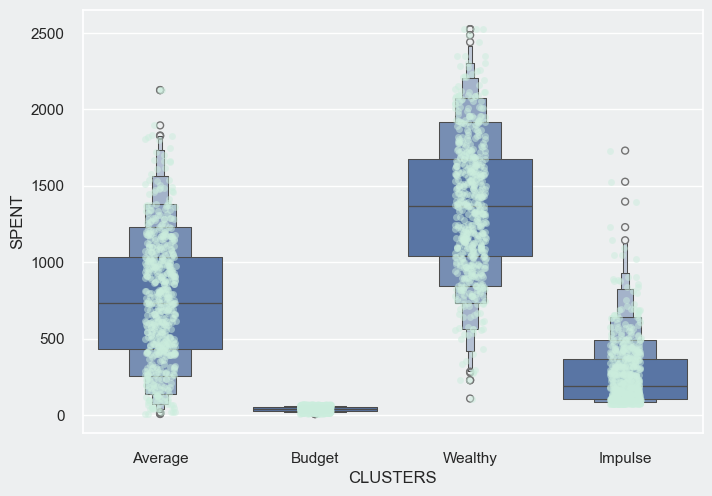

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
pl = sns.stripplot(x=df["CLUSTERS"], y=df["SPENT"], color="#CBEDDD", alpha=0.5, jitter=True)
pl = sns.boxenplot(x=df["CLUSTERS"], y=df["SPENT"])
plt.show()

Based on the graph provided, it is evident that our largest customer group is Wealthy, with Average being a close second. We can delve into the spending habits of each cluster to devise targeted marketing strategies. Let us next explore how did our campaigns do in the past.

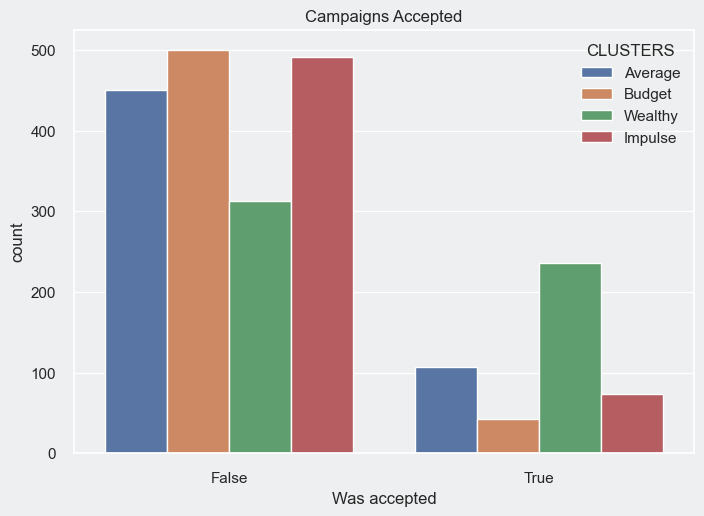

In [60]:
# Plotting count of total campaign accepted.
df["TOTAL_CAMPAIGN"] = df["CAMPAIGN_1"] + df["CAMPAIGN_2"] + df["CAMPAIGN_3"] + df["CAMPAIGN_4"] + df["CAMPAIGN_5"]

plt.figure()
plot = sns.countplot(x=df["TOTAL_CAMPAIGN"], hue=df["CLUSTERS"])
plot.set_title("Campaigns Accepted")
plot.set_xlabel("Was accepted")

# Show the plot
plt.show()

So far, the campaigns have failed more than succeeded. We need to focus and carefully plan targeted campaigns to each cluster. We know the campaigns need work, but what about the deals?

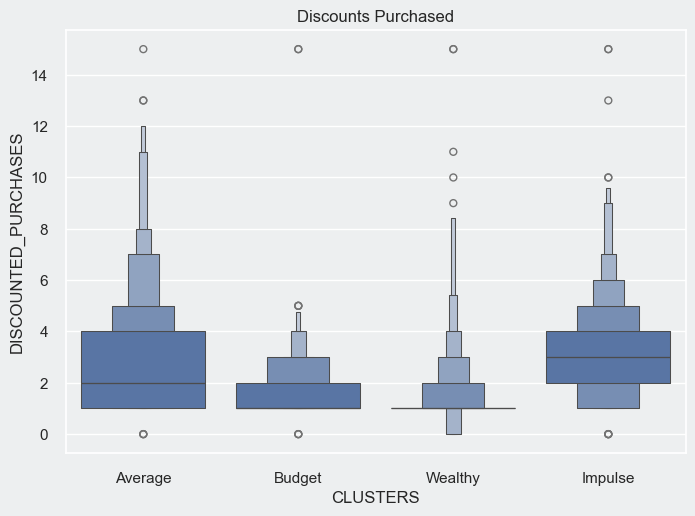

In [61]:
# Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df["DISCOUNTED_PURCHASES"],x=df["CLUSTERS"])
pl.set_title("Discounts Purchased")
plt.show()

Unlike campaigns, the deals we rolled out actually did pretty well. They performed the best among the Average group and the Impulse shoppers. However, it seems our high-value Wealthy customers weren't all that interested in the deals. Surprisingly, the Budget crowd didn't show much enthusiasm either.

## Profiling

Let's identify customers in each shopping group and determine our favorites and those needing more attention from the marketing team based on their shopping habits.

In order to market effectively we should plot the new features to profile each cluster.

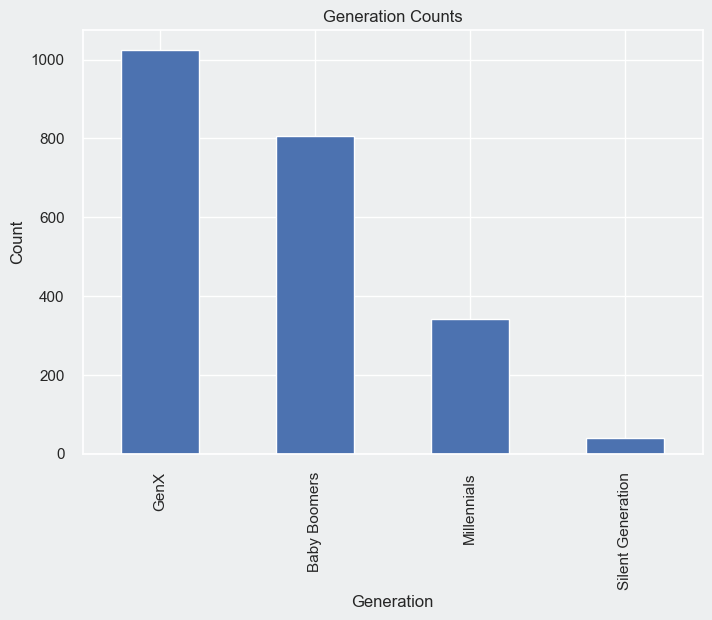

In [62]:
def map_age_to_generation(age):
    if age >= 11 and age <= 26:
        return 'GenZ'
    elif age >= 27 and age <= 42:
        return 'Millennials'
    elif age >= 43 and age <= 58:
        return 'GenX'
    elif age >= 59 and age <= 77:
        return 'Baby Boomers'
    elif age >= 78 and age <= 95:
        return 'Silent Generation'
    else:
        return 'Greatest Generation'

# Apply the function to create the 'Generation' column
df['GENERATION'] = df['AGE'].apply(map_age_to_generation)

# Aggregate data
generation_counts = df['GENERATION'].value_counts()

# Plot
generation_counts.plot(kind='bar')
plt.xlabel('Generation')
plt.ylabel('Count')
plt.title('Generation Counts')
plt.show()

Most customers are older. Looks like Millennial's need to be targeted.

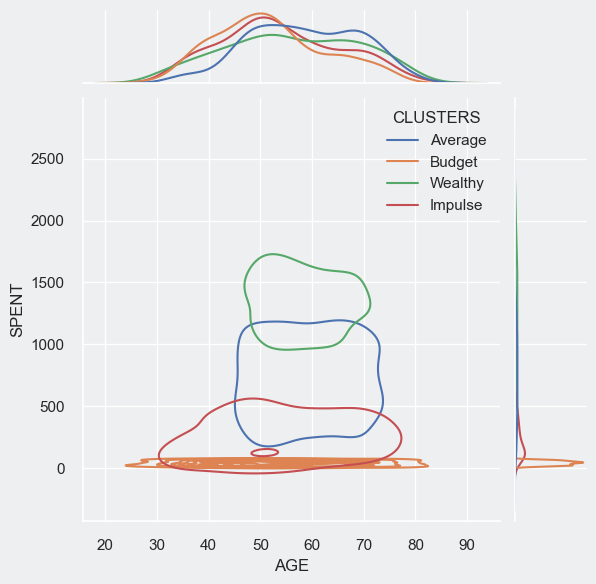

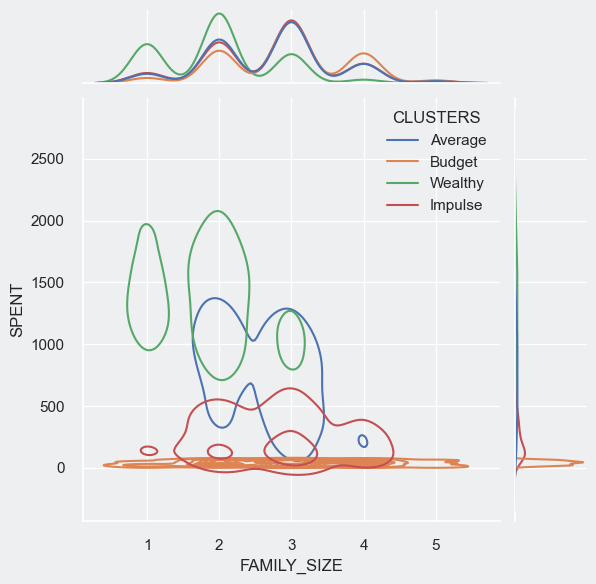

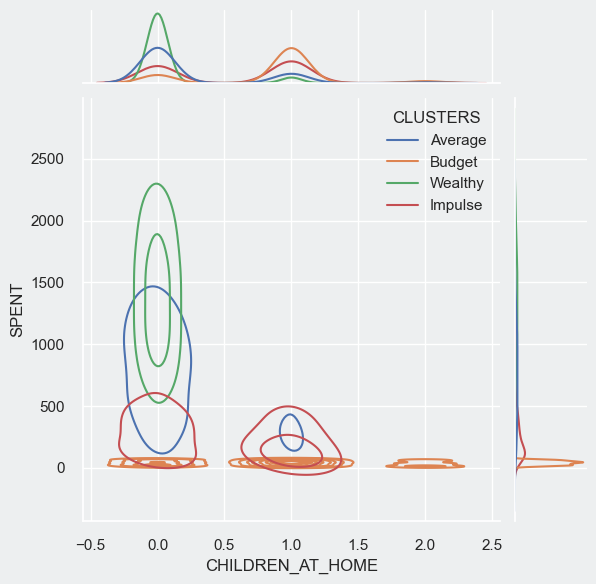

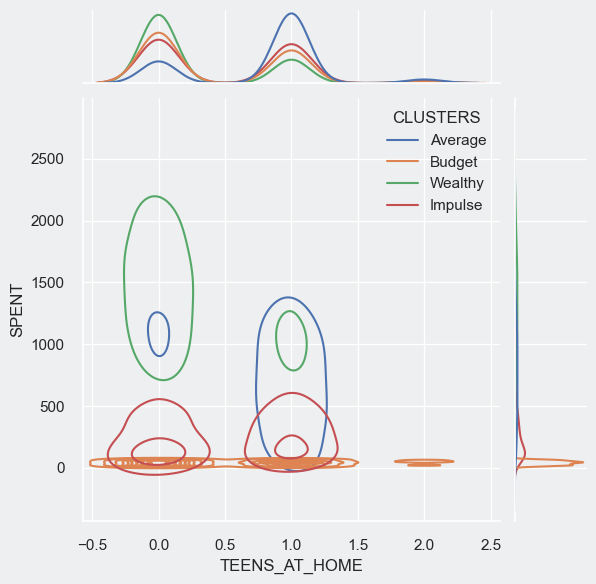

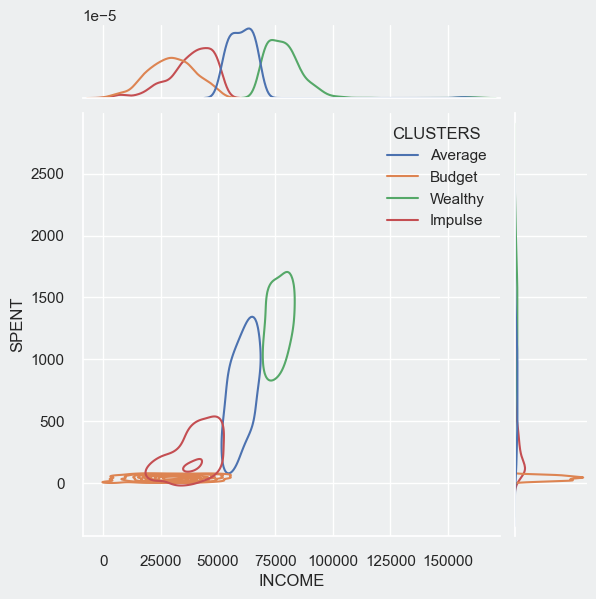

In [63]:
traits = ['AGE', 'FAMILY_SIZE', 'CHILDREN_AT_HOME', 'TEENS_AT_HOME', 'INCOME']

for trait in traits:
    sns.jointplot(data=df, x=trait, y='SPENT', hue='CLUSTERS', kind='kde')
    plt.show()

### Findings

**Budget Cluster**:
- Identified as the least valuable cluster with a limited number of individuals.
- Represents a diverse range of generations and family compositions.
- Primarily consists of older individuals.
- Characterized by lower income levels and minimal spending habits.
- Typically includes parents with families of 1-5 members, likely having children and possibly a teenager at home.
- Marketing campaigns have shown limited effectiveness, suggesting a need for more targeted approaches.
- Surprisingly, this group tends to use fewer discounts than expected.

**Impulse Cluster**:
- Recognized as a moderately valuable cluster with a moderate number of members.
- Comprises a broad spectrum of generations.
- Generally characterized by low income but higher spending tendencies.
- Commonly includes parents with a family size of 2-4, typically with one child at home.
- Marketing campaigns have had limited success with this cluster.
- This group tends to utilize a reasonable number of discounts.

**Average Cluster**:
- Considered a highly valuable cluster with a substantial number of members.
- Predominantly consists of individuals from Generation X and Baby Boomers.
- Characterized by average income and spending levels.
- Typically includes parents with a family size of 2-3, potentially with a teenager still living at home.
- Marketing campaigns have been moderately effective with this group.
- This cluster is known for making good use of discounts.

**Wealthy Cluster**:
- Rated as the most valuable cluster with a significant number of members and highest spending.
- Primarily composed of Generation X and Baby Boomers.
- Characterized by high income and significant spending habits.
- Most members are couples, often without children, or if they are parents, they may have just one teenager at home.
- Marketing campaigns have achieved moderate success with this group.
- Members of this cluster tend to use discounts less frequently.

# Marketing Recommendations:

**Budget Cluster Marketing Ideas**:
- Family-Focused Deals: Since many in this cluster are parents with up to 5 people in the family, including children and possibly a teen, we should highlight offers that cater to family needs and budgets. This could mean bundling products or offering family-sized deals.
- Parent-Friendly Rewards: Our loyalty program could include special perks for parents, like discounts on kids' items or family activities. This could encourage more frequent visits from larger families.
- Customized Communication for Families: Tailoring our emails or mailers with family-oriented content and offers can make a big difference. It's all about showing them we understand their family dynamics and needs.

**Impulse Cluster Marketing Ideas**:
- Promotions for Parents with Kids: This group typically consists of parents with a smaller family size, usually with one child at home. Our promotions can focus on products that appeal to both parents and children, encouraging spontaneous purchases.
- Family-Friendly Online Content: Our digital content should be engaging and appealing to both parents and kids. Think about interactive social media campaigns or family-oriented contests.
- Streamlined Shopping for Busy Parents: We should aim for a shopping experience that's quick and hassle-free, especially for parents who might be shopping with a child.

**Average Cluster Marketing Ideas**:
- Balanced Family Offers: With most in this cluster being parents, often with a teenager at home, our marketing should balance offers that appeal to both adults and teens. This might include tech gadgets, clothing, or entertainment options.
- Diverse Ad Strategies for Families: Since they have diverse interests spanning generations, a combination of digital and traditional marketing can effectively reach these family-oriented consumers.
- Testimonials from Families: Sharing stories or reviews from families, particularly those with teenagers, can resonate more with this group and build a deeper connection.

**Wealthy Cluster Marketing Ideas**:
- Exclusive Offers for Sophisticated Families: This group, often consisting of couples or parents with a teenager, looks for premium experiences. We can offer exclusive family packages or high-end products that cater to a sophisticated lifestyle.
- Subtle, High-End Family Marketing: Our advertising should be understated yet luxurious, appealing to their desire for exclusivity and quality. We can think about sponsoring upscale family events or partnering with luxury family-oriented brands.
- VIP Service for Parents and Teens: Providing top-notch customer service, especially catering to the needs of parents with teens, can enhance their shopping experience and reinforce their loyalty to our brand.